In [1]:
from fish_helpers import *

In [2]:
cai = pd.read_csv('/bigstore/binfo/mouse/3T3/Long_Cai_NIH3T3_spot_counts_040219.csv')
cai

,1700022a21rik,1700025g04rik,4933401b06rik,5830417i10rik,9330102e08rik,9430018g01rik,9430083a17rik,Aanat,Aasdh,Aatf,...,Ubqlnl,Ptgdr,P2ry4,Prdm6,Pde6b,Zp1,Dlx4,Opn1sw,Pramef12,Hes1
0,0,3,5,5,1,0,2,0,2,16,...,0,2,0,0,0,0,0,0,0,69
1,1,4,0,10,2,0,1,2,0,12,...,0,3,1,0,0,1,1,1,0,49
2,0,5,1,3,2,1,2,0,2,18,...,0,0,0,0,0,0,0,1,0,54
3,2,5,4,13,3,1,3,0,2,21,...,2,1,1,0,3,4,4,1,0,47
4,0,0,0,8,0,0,0,1,0,7,...,0,0,1,1,0,1,1,0,0,17
5,0,2,0,10,2,0,3,0,2,19,...,1,0,0,0,1,2,2,0,0,31
6,0,3,1,4,2,0,1,0,0,9,...,0,3,1,0,2,0,0,0,1,45
7,1,0,0,5,1,2,0,1,0,11,...,2,0,0,1,1,1,0,0,0,55
8,0,7,0,7,0,1,2,0,0,18,...,1,0,0,0,0,0,1,0,0,23
9,0,6,1,7,2,0,2,0,0,10,...,0,1,0,0,0,0,0,0,0,52


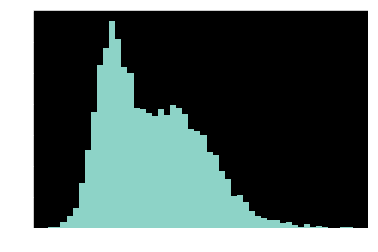

In [3]:
plt.hist(np.log10(np.average(cai,axis=0)),bins=50)
plt.show()

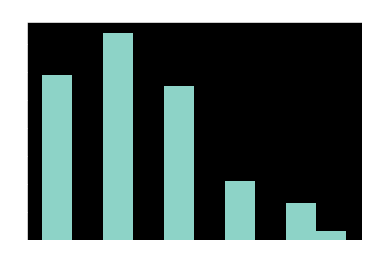

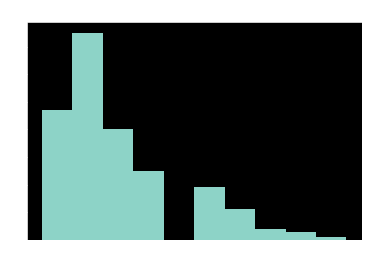

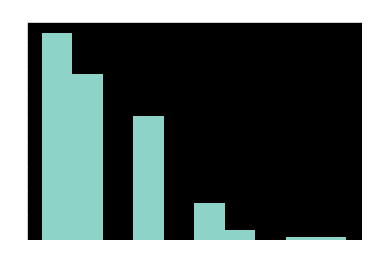

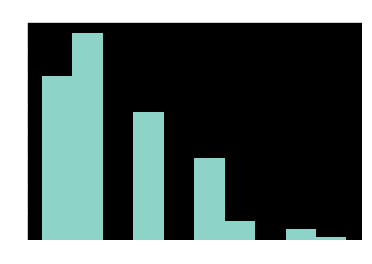

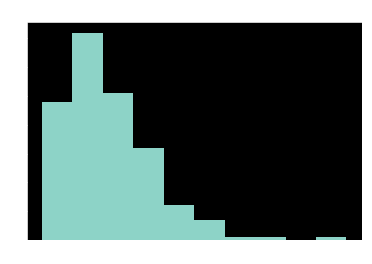

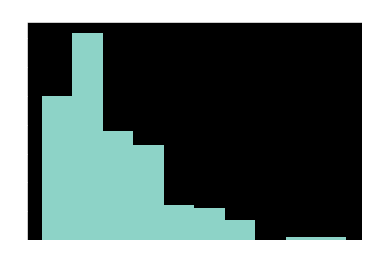

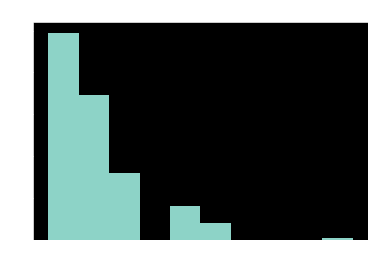

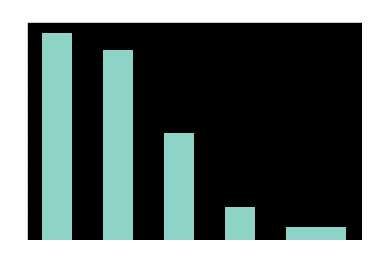

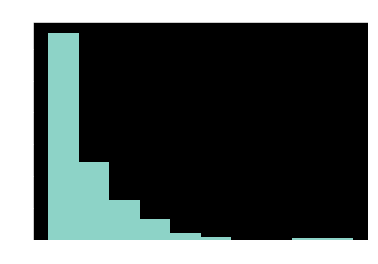

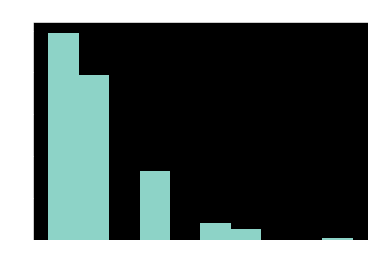

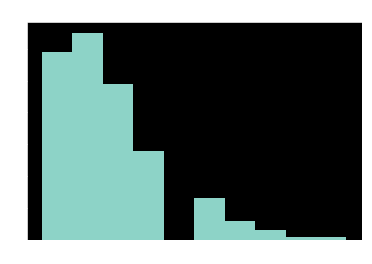

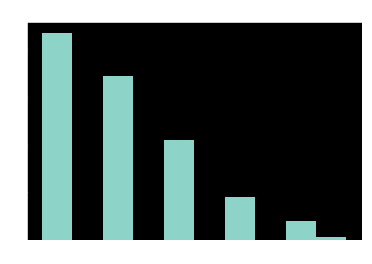

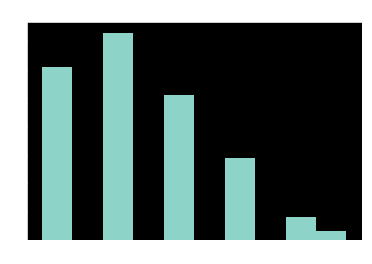

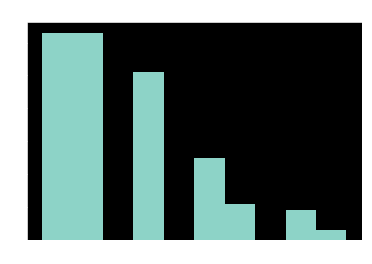

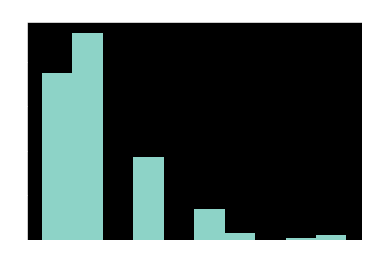

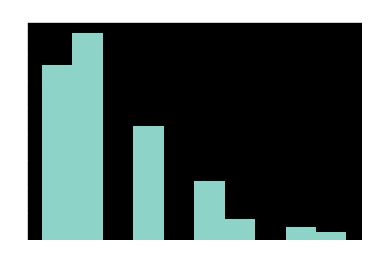

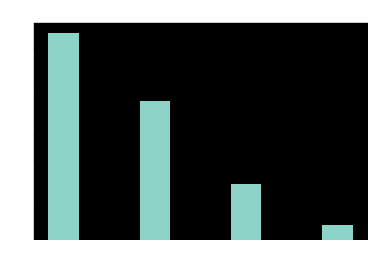

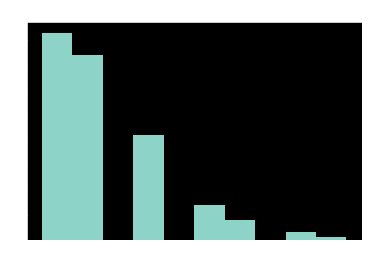

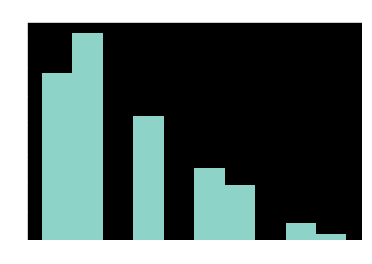

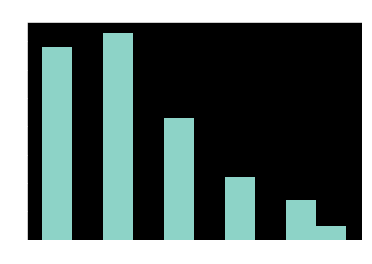

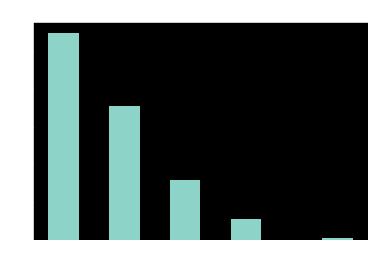

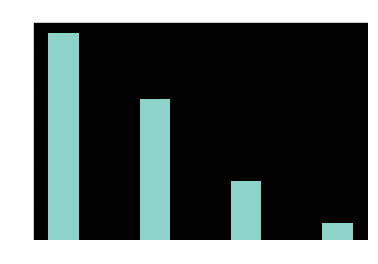

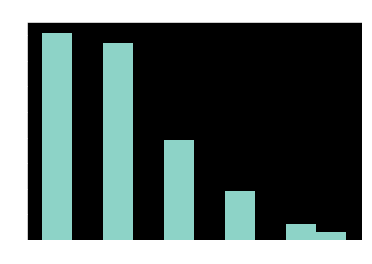

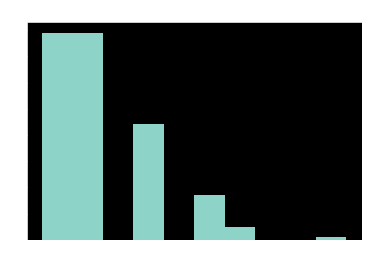

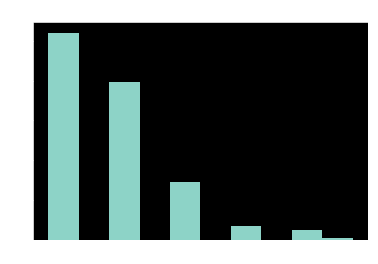

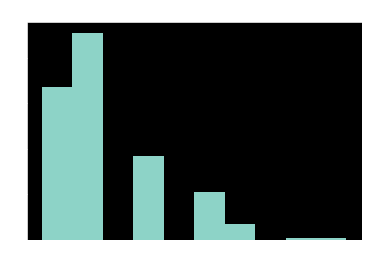

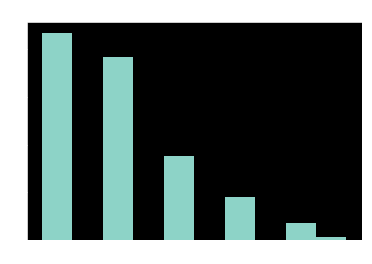

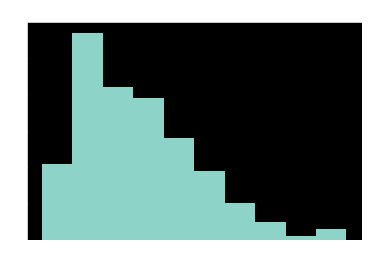

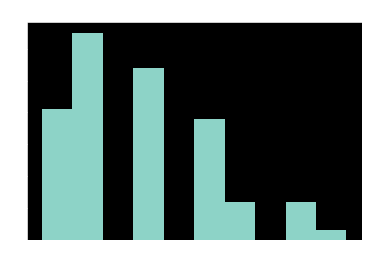

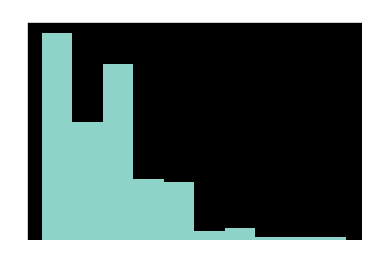

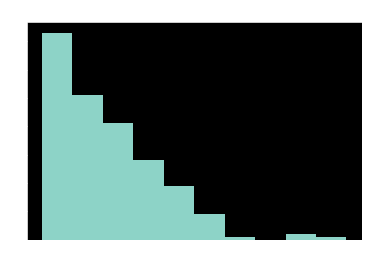

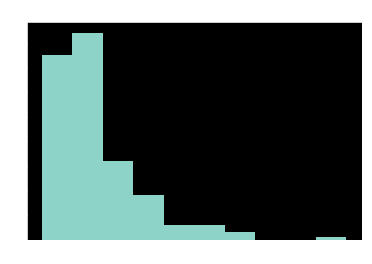

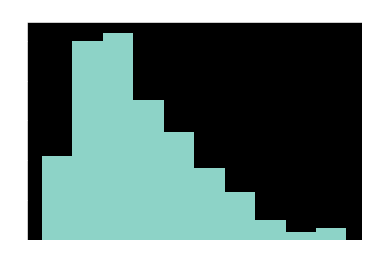

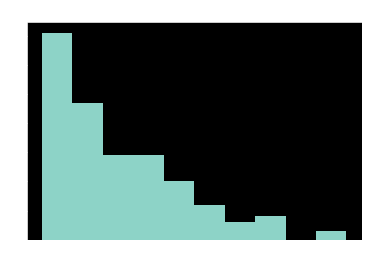

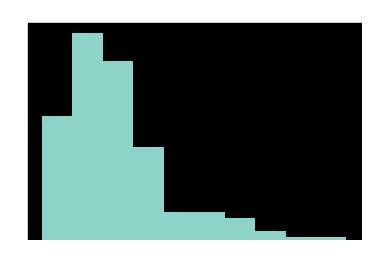

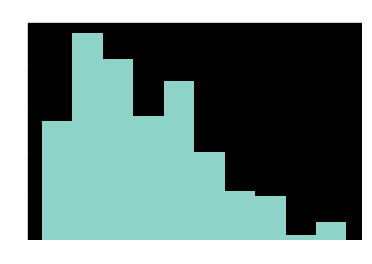

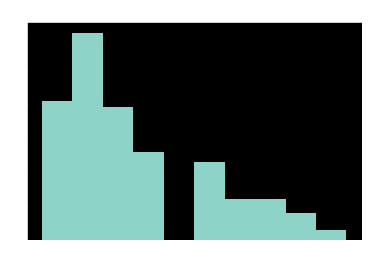

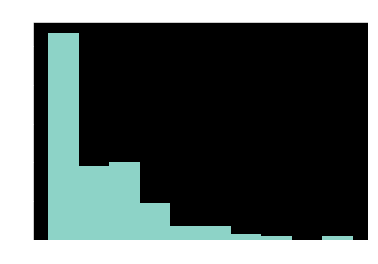

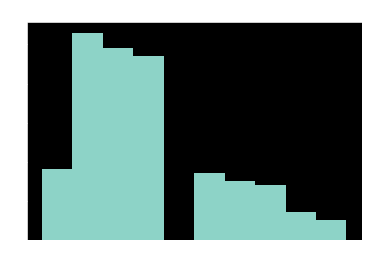

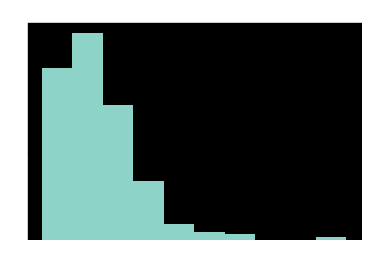

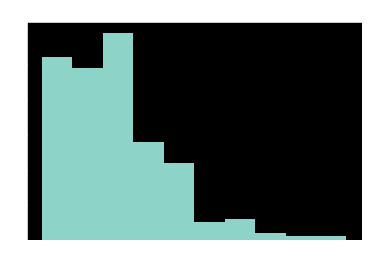

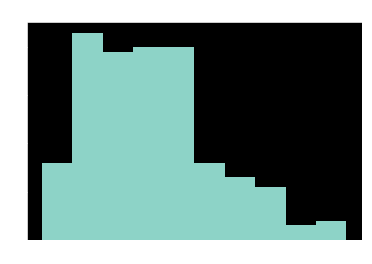

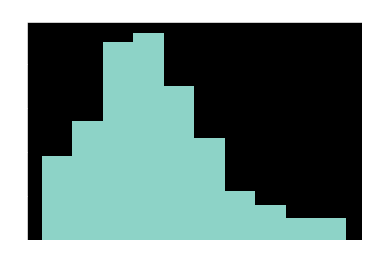

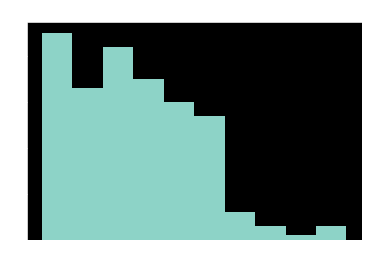

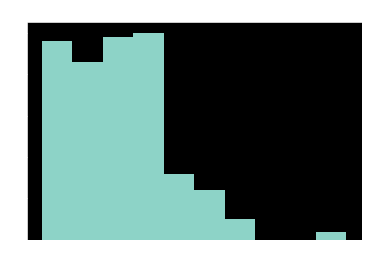

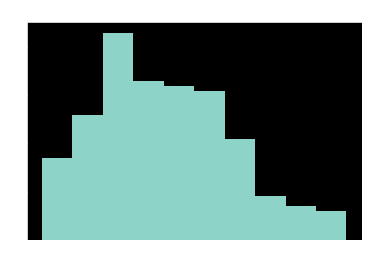

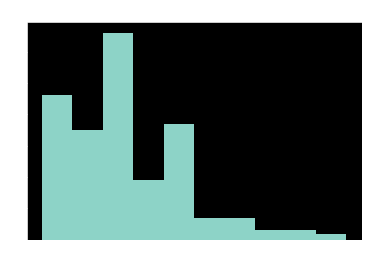

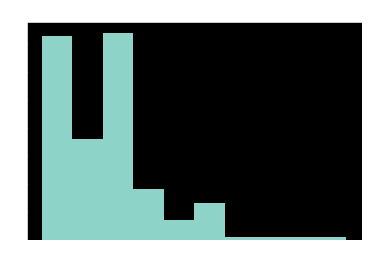

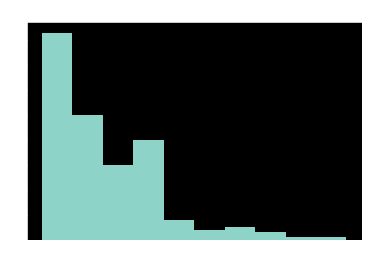

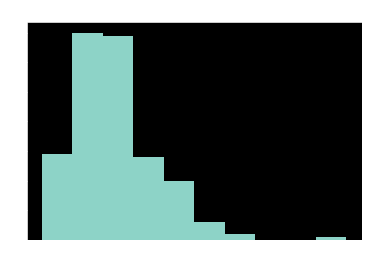

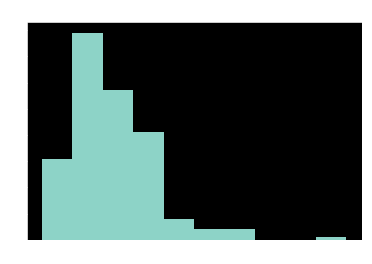

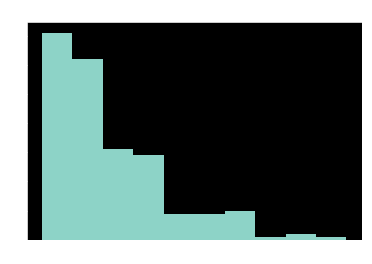

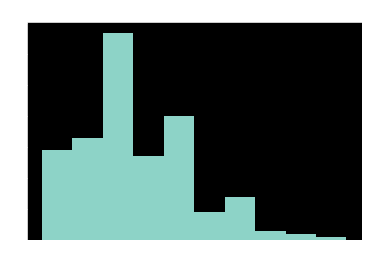

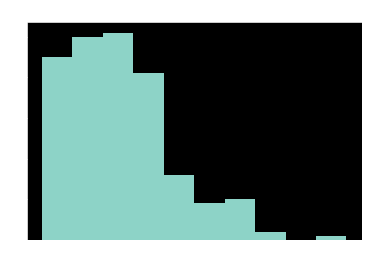

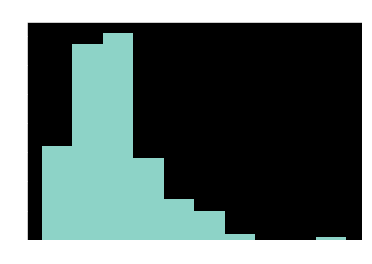

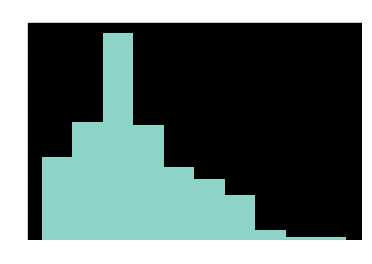

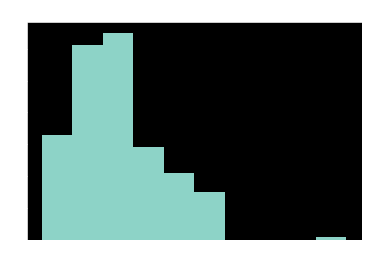

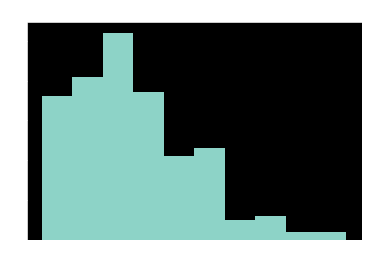

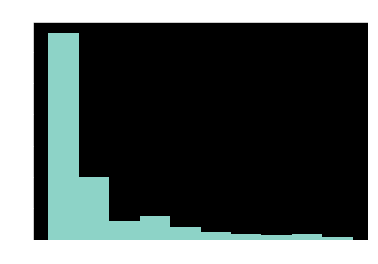

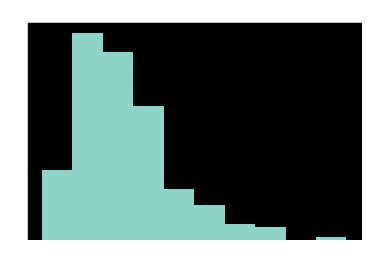

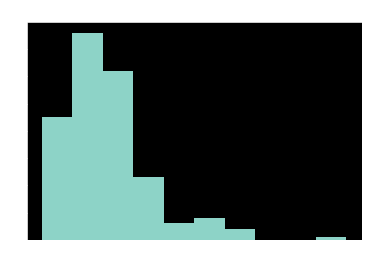

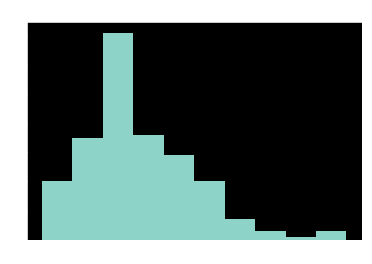

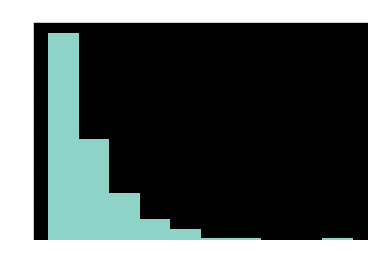

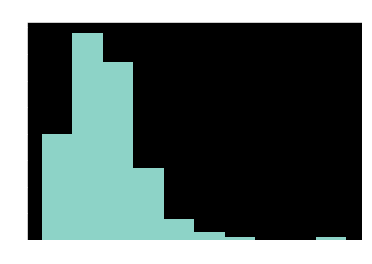

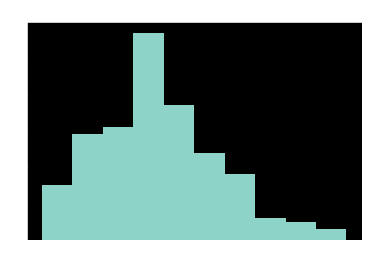

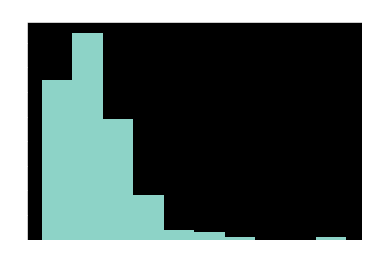

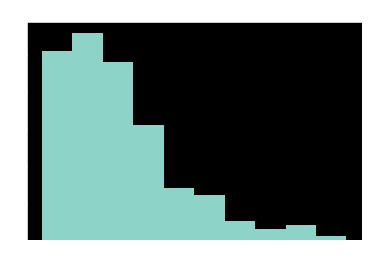

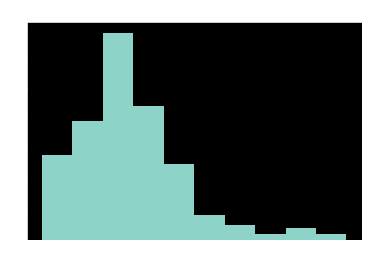

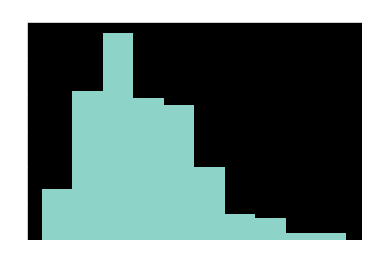

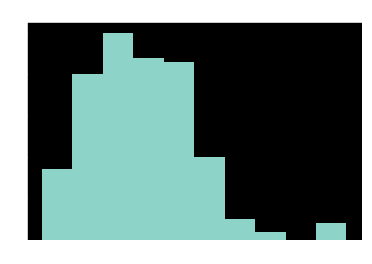

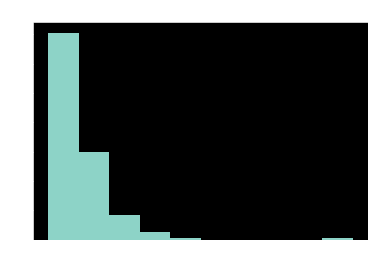

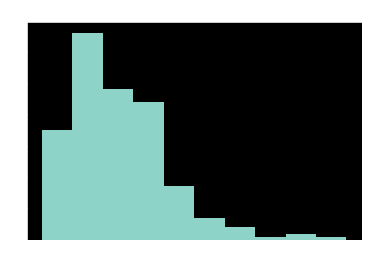

In [30]:
medians = pd.DataFrame(np.median(cai,axis=0),index=cai.columns).sort_values(0,ascending=True)
averages = pd.DataFrame(np.average(cai,axis=0),index=cai.columns).sort_values(0,ascending=True)
for i,gene in enumerate(medians.index):
    if i%100==0:
        if medians[0].loc[gene]>0:
            plt.hist(cai[gene])
            plt.title(gene+'_'+str(round(averages[0].loc[gene],2)))
            plt.show()

In [6]:
covariation_matrix = np.cov(cai.T)
covariation_matrix_df = pd.DataFrame(covariation_matrix,index=cai.columns,columns=cai.columns)

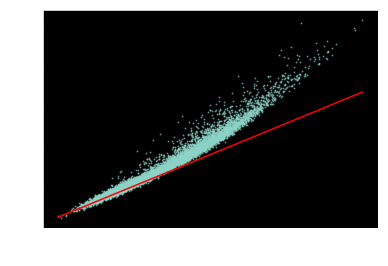

In [40]:
X = np.log10(np.average(cai,axis=0))
Y = np.log10(covariation_matrix[range(len(cai.columns)),range(len(cai.columns))].ravel())
plt.scatter(X,Y,s=1,alpha=0.5)
plt.plot([X.min(),X.max()],[X.min(),X.max()],c='r')
plt.xlabel('Log10 Mean Expression')
plt.ylabel('Log10 Variance')
plt.show()

In [52]:
np.average(cai,axis=0)**2

array([7.13086420e-01, 7.59308642e+00, 1.24446420e+00, ...,
       1.49511111e-01, 2.52227160e-01, 1.08577572e+03])

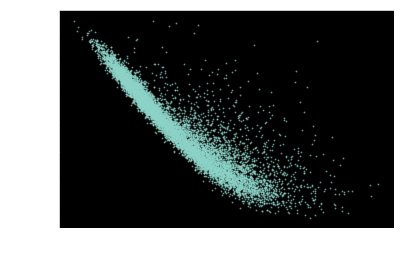

In [54]:
X = np.log10(np.average(cai,axis=0))
Y = np.log10(covariation_matrix[range(len(cai.columns)),range(len(cai.columns))].ravel()/(np.average(cai,axis=0)**2))
plt.scatter(X,Y,s=1,alpha=0.5)
plt.xlabel('Log10 Mean Expression')
plt.ylabel('Log10 cv**2')
plt.show()

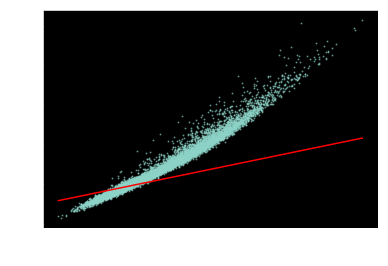

In [42]:
X = np.log10(np.sqrt(np.average(cai,axis=0)))
Y = np.log10(covariation_matrix[range(len(cai.columns)),range(len(cai.columns))].ravel())
plt.scatter(X,Y,s=1,alpha=0.5)
plt.plot([X.min(),X.max()],[X.min(),X.max()],c='r')
plt.xlabel('Log10 sqrt Mean Expression')
plt.ylabel('Log10 Variance')
plt.show()

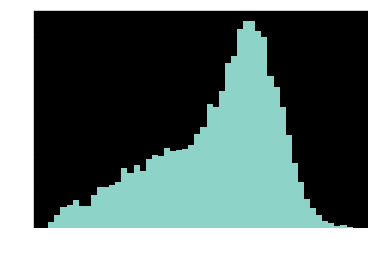

In [8]:
plt.hist(np.mean(cai,axis=0)/covariation_matrix[range(len(cai.columns)),range(len(cai.columns))].ravel(),bins=50)
plt.xlabel('Mean/Variance')
plt.show()

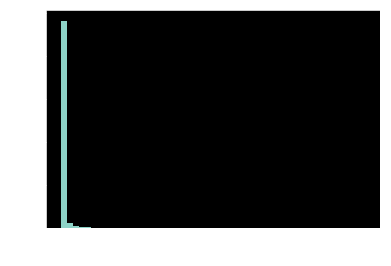

In [50]:
plt.hist(covariation_matrix[range(len(cai.columns)),range(len(cai.columns))].ravel()/np.mean(cai,axis=0),bins=50)
plt.xlabel('Variance/Mean')
plt.show()

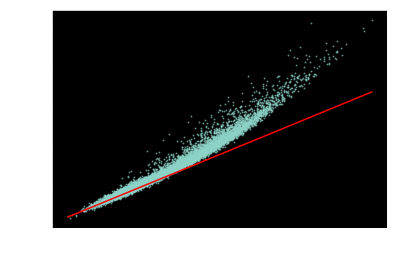

In [39]:
X = np.sqrt(np.average(cai,axis=0))
Y = np.std(cai,axis=0)
plt.scatter(np.log10(X),np.log10(Y),s=1,alpha=0.5)
plt.plot([np.log10(X.min()),np.log10(X.max())],[np.log10(X.min()),np.log10(X.max())],color='r')
plt.xlabel('Log10 sqrt(mean)')
plt.ylabel('Log10 std')
plt.show()

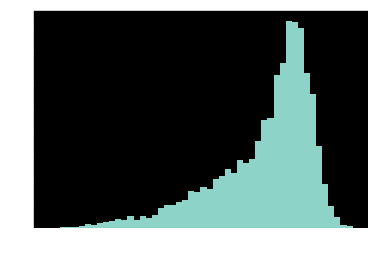

In [41]:
X = np.sqrt(np.average(cai,axis=0))
Y = np.std(cai,axis=0)
plt.hist(X/Y,bins=50)
plt.xlabel('sqrt(mean)/std')
plt.show()

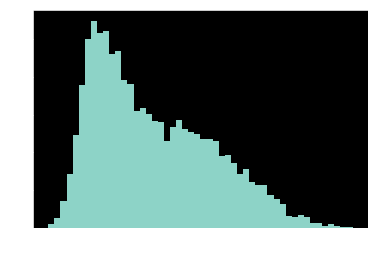

In [35]:
plt.hist(np.average(cai,axis=0)/np.std(cai,axis=0),bins=50)
plt.xlabel('Mean/std')
plt.show()

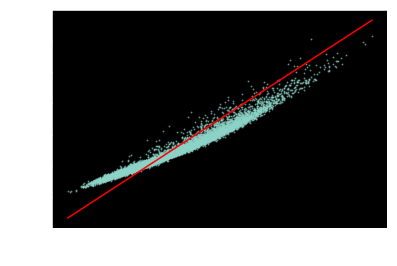

In [38]:
X = np.mean(cai,axis=0)
Y = np.std(cai,axis=0)
plt.scatter(np.log10(X),np.log10(Y),s=1,alpha=0.5)
plt.plot([np.log10(X.min()),np.log10(X.max())],[np.log10(X.min()),np.log10(X.max())],color='r')
plt.xlabel('Log10 mean')
plt.ylabel('Log10 std')
plt.show()

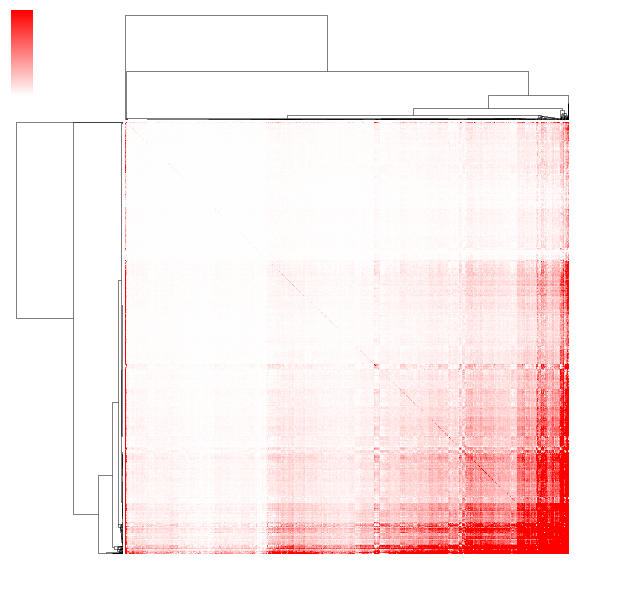

In [18]:
vmin = np.percentile(covariation_matrix.ravel(),1)
vmax = np.percentile(covariation_matrix.ravel(),100-1)
genes = random.sample(list(medians[medians[0]>0].index),1000)
sns.clustermap(covariation_matrix_df[genes].loc[genes],cmap='bwr',center=0,vmax=vmax,vmin=vmin)
plt.show()

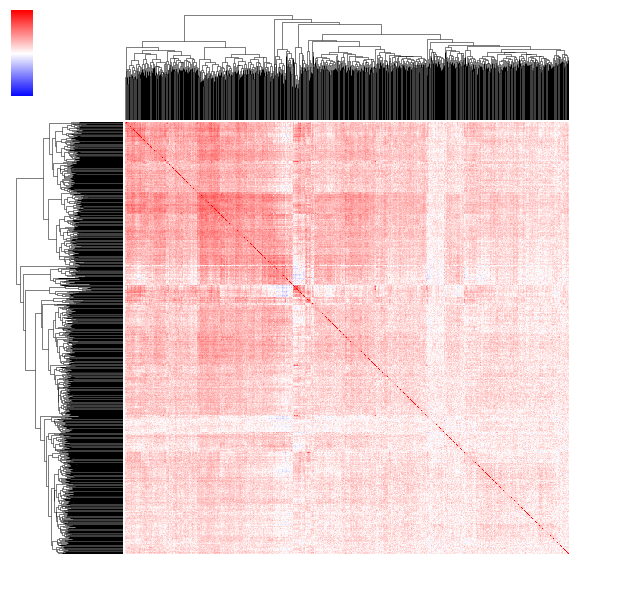

In [19]:
correlation_matrix = np.corrcoef(cai.T)
correlation_matrix_df = pd.DataFrame(correlation_matrix,index=cai.columns,columns=cai.columns)
vmin = -1
vmax = 1
genes = random.sample(list(medians[medians[0]>0].index),1000)
sns.clustermap(correlation_matrix_df[genes].loc[genes],cmap='bwr',center=0,vmax=vmax,vmin=vmin)
plt.show()

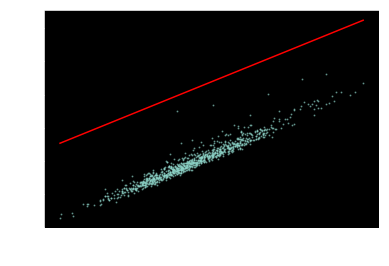

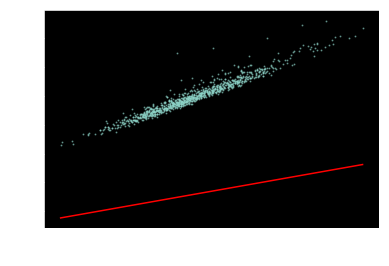

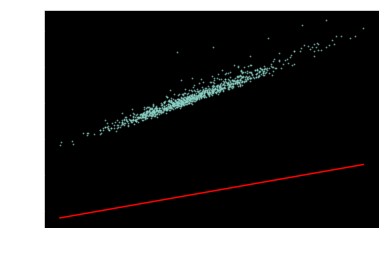

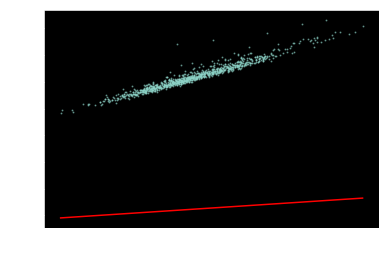

In [49]:
random_sum_cai = pd.DataFrame(index=cai.index)
genes = list(cai.columns)
nsums = 1000
for i in range(nsums):
    random_sum_cai[i] = np.sum(cai[random.sample(genes,50)],axis=1)
cov = np.cov(random_sum_cai.T)
X = np.log10(np.mean(random_sum_cai,axis=0))
Y = np.log10(np.std(random_sum_cai,axis=0))
plt.scatter(X,Y,s=1,alpha=0.5)
plt.plot([X.min(),X.max()],[X.min(),X.max()],color='r')
plt.xlabel('Log10 mean')
plt.ylabel('Log10 std')
plt.show()
X = np.log10(np.sqrt(np.mean(random_sum_cai,axis=0)))
Y = np.log10(np.std(random_sum_cai,axis=0))
plt.scatter(X,Y,s=1,alpha=0.5)
plt.plot([X.min(),X.max()],[X.min(),X.max()],color='r')
plt.xlabel('Log10 sqrt mean')
plt.ylabel('Log10 std')
plt.show()

X = np.log10(np.mean(random_sum_cai,axis=0))
Y = np.log10(cov[range(nsums),range(nsums)].ravel())
plt.scatter(X,Y,s=1,alpha=0.5)
plt.plot([X.min(),X.max()],[X.min(),X.max()],color='r')
plt.xlabel('Log10 mean')
plt.ylabel('Log10 var')
plt.show()
X = np.log10(np.sqrt(np.mean(random_sum_cai,axis=0)))
Y = np.log10(cov[range(nsums),range(nsums)].ravel())
plt.scatter(X,Y,s=1,alpha=0.5)
plt.plot([X.min(),X.max()],[X.min(),X.max()],color='r')
plt.xlabel('Log10 sqrt mean')
plt.ylabel('Log10 var')
plt.show()

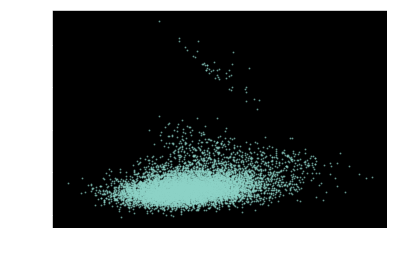

In [56]:
random_sum_cai = pd.DataFrame(index=cai.index)
genes = list(cai.columns)
nsums = 10000
for i in range(nsums):
    random_sum_cai[i] = np.sum(cai[random.sample(genes,50)],axis=1)
cov = np.cov(random_sum_cai.T)
X = np.log10(np.average(random_sum_cai,axis=0))
Y = np.log10(cov[range(nsums),range(nsums)].ravel()/(np.average(random_sum_cai,axis=0)**2))
plt.scatter(X,Y,s=1,alpha=0.5)
plt.xlabel('Log10 Mean Expression')
plt.ylabel('Log10 cv**2')
plt.show()

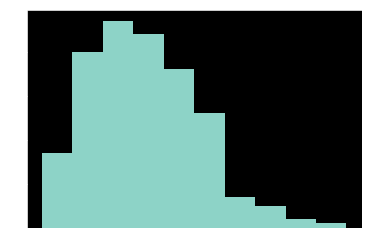

In [57]:
plt.hist(random_sum_cai[i])
plt.show()

In [63]:
"""
Load seperability filtered counts
"""
from scipy import sparse
base = '/bigstore/binfo/mouse/Hippocampus/'
filtered_counts_sparse = sparse.load_npz(os.path.join(base,'Allen/seperability_filtered_counts.npz'))
filtered_counts = filtered_counts_sparse.A
cells = list(pd.read_csv(os.path.join(base,'Allen/seperability_filtered_cells.csv'),index_col=0)['0'])
filtered_genes = list(pd.read_csv(os.path.join(base,'Allen/seperability_filtered_genes.csv'),index_col=0)['0'])
filtered_counts = pd.DataFrame(filtered_counts,index=filtered_genes,columns=cells)

In [62]:
metadata = pd.read_csv(os.path.join(base,'sample_annotations.csv'),index_col=0)
good_types = [i for i in metadata['cell_type_alias_label'].unique() if (not 'Doub' in i)&(not 'Quality' in i)&(not 'Unknown' in i)]

/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (36,54) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [61]:
filtered_counts.shape

(1220, 74967)

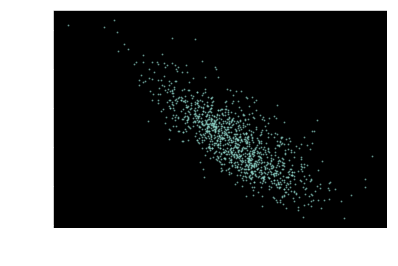

In [65]:
cluster = metadata['cell_type_alias_label'].unique()[5]
df = filtered_counts[metadata[metadata['cell_type_alias_label']==cluster].index]
cov = np.cov(df)
X = np.log10(np.average(df,axis=1))
Y = np.log10(cov[range(len(df.index)),range(len(df.index))].ravel()/(np.average(df,axis=1)**2))
plt.scatter(X,Y,s=1,alpha=0.5)
plt.xlabel('Log10 Mean Expression')
plt.ylabel('Log10 cv**2')
plt.show()

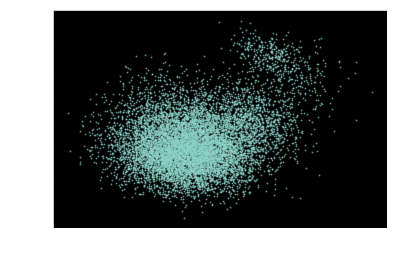

In [101]:
cluster = metadata['cell_type_alias_label'].unique()[5]
df = filtered_counts[metadata[metadata['cell_type_alias_label']==cluster].index]
random_sum_allen = pd.DataFrame(index=df.columns)
genes = list(df.index)
nsums = 10000
for i in range(nsums):
    random_sum_allen[i] = np.sum(df.loc[random.sample(genes,50)],axis=0)
cov = np.cov(random_sum_allen.T)
X = np.log10(np.average(random_sum_allen,axis=0))
Y = np.log10(cov[range(nsums),range(nsums)].ravel()/(np.average(random_sum_allen,axis=0)**2))
plt.scatter(X,Y,s=1,alpha=0.5)
plt.xlabel('Log10 Mean Expression')
plt.ylabel('Log10 cv**2')
plt.show()

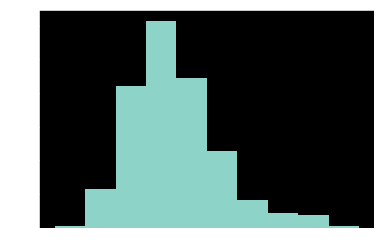

In [102]:
plt.hist(Y)
plt.show()

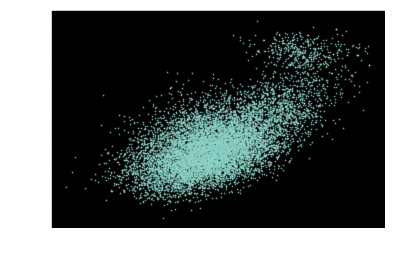

In [103]:
cluster = metadata['cell_type_alias_label'].unique()[5]
df = filtered_counts[metadata[metadata['cell_type_alias_label']==cluster].index]
random_sum_allen = pd.DataFrame(index=df.columns)
genes = list(df.index)
nsums = 10000
for i in range(nsums):
    random_sum_allen[i] = np.sum(df.loc[random.sample(genes,50)],axis=0)
cov = np.cov(random_sum_allen.T)
X = np.log10(np.average(random_sum_allen,axis=0))
Y = np.log10(cov[range(nsums),range(nsums)].ravel()/(np.average(random_sum_allen,axis=0)))
plt.scatter(X,Y,s=1,alpha=0.5)
plt.xlabel('Log10 Mean Expression')
plt.ylabel('Log10 cv')
plt.show()

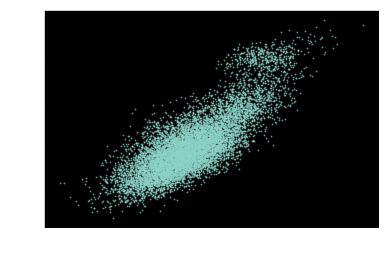

In [104]:
cluster = metadata['cell_type_alias_label'].unique()[5]
df = filtered_counts[metadata[metadata['cell_type_alias_label']==cluster].index]
random_sum_allen = pd.DataFrame(index=df.columns)
genes = list(df.index)
nsums = 10000
for i in range(nsums):
    random_sum_allen[i] = np.sum(df.loc[random.sample(genes,50)],axis=0)
cov = np.cov(random_sum_allen.T)
X = np.log10(np.average(random_sum_allen,axis=0))
Y = np.log10(cov[range(nsums),range(nsums)].ravel())
plt.scatter(X,Y,s=1,alpha=0.5)
plt.xlabel('Log10 Mean Expression')
plt.ylabel('Log10 var')
plt.show()

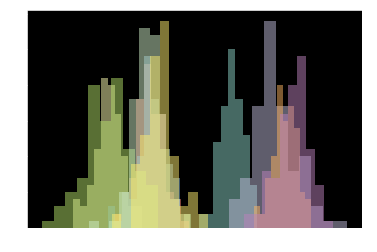

In [82]:
for i in range(10):
    plt.hist(np.log10(random_sum_allen[i]),alpha=0.5)
plt.show()

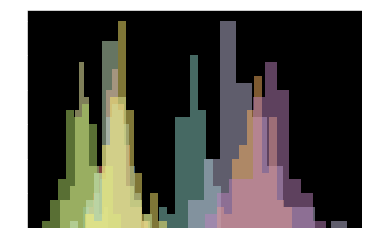

In [83]:
for i in range(10):
    plt.hist(random_sum_allen[i],alpha=0.5)
plt.show()

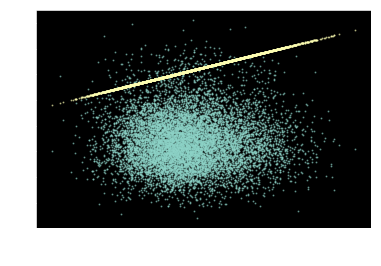

In [94]:
X = np.log10(np.average(random_sum_allen,axis=0))
p = 0
Y = np.log10(cov[range(nsums),range(nsums)].ravel())
var = X+(X**2)*(p**2)
plt.scatter(X,Y,s=1,alpha=0.5)
plt.scatter(X,var,s=1,alpha=0.5)
plt.xlabel('Log10 Mean Expression')
plt.show()